<a href="https://colab.research.google.com/github/renanas/MachineLearning_Study/blob/main/Estudo_Predi%C3%A7%C3%A3o_Fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo fraudes

Iremos fazer uma estudo com base no curso da Alura: https://cursos.alura.com.br/course/modelos-preditivos-dados-deteccao-fraude

Base de dados: https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example

Estudaremos essa base de dados para tentar identificar as possiveis transações que são fraudes.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/fraud_dataset_example.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


Não temos valores numeros e tem alguns tipos que não são numeros, possivelmente vamos mudar

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Queria já começar a ver as fraudes no começo para facil visualização

In [6]:
df = df[['isFraud', 'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [7]:
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud': 'super_fraude',
    'step': 'tempo',
    'type': 'tipo',
    'amount': 'valor',
    'nameOrig': 'cliente1',
    'oldbalanceOrg': 'saldo_inicial_cl1',
    'newbalanceOrig': 'saldo_atualizado_cl1',
    'nameDest': 'cliente2',
    'oldbalanceDest': 'saldo_inicial_cl2',
    'newbalanceDest': 'saldo_atualizado_cl2'
}

In [8]:
df = df.rename(columns=colunas)
df.head()

,fraude,super_fraude,tempo,tipo,valor,cliente1,saldo_inicial_cl1,saldo_atualizado_cl1,cliente2,saldo_inicial_cl2,saldo_atualizado_cl2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
super_fraude,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_inicial_cl1,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
saldo_atualizado_cl1,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_inicial_cl2,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
saldo_atualizado_cl2,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [10]:
df.shape

(101613, 11)

In [11]:
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

Temos 116 registros com fraude

In [12]:
df.groupby('super_fraude').tempo.count()

super_fraude
0    101613
Name: tempo, dtype: int64

Não temos registro que a fraude foi grande, apenas pequenas fraudes passam pelo sistema de analise de compra do banco.

# Conhecendo o Pandas Profiling

Basicamente ele não precisa de tantos dados para poder fazer uma analise, dessa forma vamos conseguir analisar os dados com menos quantidade isso permite que nosso estudo seja mais rapido pois tem menos dados para analisar.

In [13]:
# Instalando o pandas profiling
!pip install -U pandas-profiling

In [14]:
# !pip install pydantic-settings

In [15]:
# Essa é a biblioteca que vamos utilizar
!pip install ydata-profiling

O Pandas profiling parece que foi descontinuado ou a biblioteca mudou de lugar, agora vamos usar o ydata_profiling que tem o recurso que precisamos.

In [16]:
# import ydata_profiling

In [17]:
# ydata_profiling.ProfileReport(df)

Ele carrega uma parte de sumarização que faz boa parte da analise fizemos manualmente e nos traz algumas analises dos campos e mais algumas informações como correlação e a comparação de dois campos, na aba de interação.

Vimos que a variavel tipo é uma variavel categorica, e isso pode nos dar problemas na nossa analise, e vamos transformar em uma variavel numerica para a gente poder analisar.

In [18]:
df = pd.get_dummies(data=df, columns=['tipo'])
df.head(10)

,fraude,super_fraude,tempo,valor,cliente1,saldo_inicial_cl1,saldo_atualizado_cl1,cliente2,saldo_inicial_cl2,saldo_atualizado_cl2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,0,1,0
1,0,0,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,0,1,0
2,1,0,1,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,0,0,0,0,1
3,1,0,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,0,1,0,0,0
4,0,0,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,0,1,0
5,0,0,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,0,1,0
6,0,0,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,0,1,0
7,0,0,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,0,1,0
8,0,0,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,0,1,0
9,0,0,1,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,1,0,0


o nome dos clientes não importa na nossa analise e também a super fraude já que não temos nenhum caso positivo dela.

In [19]:
df.drop(['cliente1', 'cliente2', 'super_fraude'], axis=1, inplace=True)
df.head(10)

,fraude,tempo,valor,saldo_inicial_cl1,saldo_atualizado_cl1,saldo_inicial_cl2,saldo_atualizado_cl2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.00,160296.36,0.0,0.00,0,0,0,1,0
1,0,1,1864.28,21249.00,19384.72,0.0,0.00,0,0,0,1,0
2,1,1,181.00,181.00,0.00,0.0,0.00,0,0,0,0,1
3,1,1,181.00,181.00,0.00,21182.0,0.00,0,1,0,0,0
4,0,1,11668.14,41554.00,29885.86,0.0,0.00,0,0,0,1,0
5,0,1,7817.71,53860.00,46042.29,0.0,0.00,0,0,0,1,0
6,0,1,7107.77,183195.00,176087.23,0.0,0.00,0,0,0,1,0
7,0,1,7861.64,176087.23,168225.59,0.0,0.00,0,0,0,1,0
8,0,1,4024.36,2671.00,0.00,0.0,0.00,0,0,0,1,0
9,0,1,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,1,0,0


# Regressao Logistica

In [20]:
x = df.drop('fraude', axis=1)
y = df['fraude']

In [21]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=SEED)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)

In [24]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
y_pred = lr.predict(x_test)

Com o nosso modelo treinado utilizando a Regressão logistica, hora de fazermos a analise dos resultado utilizando as metricas mais comuns, Acuracia, Precisão, Recall e F1 Score.

In [26]:
from sklearn import metrics

print('Acuracia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisao: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1 Score: ', metrics.f1_score(y_test, y_pred))

Acuracia:  0.9989765391276965
Precisao:  0.2
Recall:  0.043478260869565216
F1 Score:  0.07142857142857142


Temos um modelo interessante:

1.   Acuracia bem alta, está acertando bem.
2.   Precisão bem baixa, então quando é fraude ela está acertando pouco.
3.   Recall baixo, ela está baixa, não sabe identificar muito bem as duas classes, fraude ou não.
4.   F1, pelo que entendo o F1 depende um pouco da Acuracia, então se a acuracia for alta e o F1 for baixo significa que o nosso F1 não é muito bom.


O que deve estar acontecendo é que devido a quantidade de dados e muitas de classe 0 em fraude, nosso modelo está colocando muitos 0 isso aumenta nossa acuracia, mas quando chega o momento de classificar como fraude 1 ele está colocando 0, por isso nossa precisao e recall estão baixos. (Por enquanto um palpite)

Vamos usar a matrix de confusão para analisar melhor.

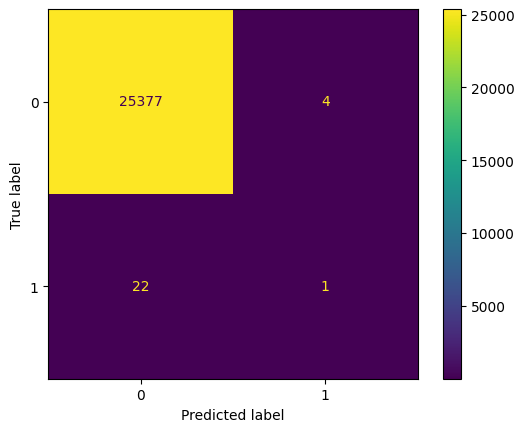

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

Como disse, quando temos os verdadeiros negativos ele está acertando muito 25377 porém quando temos os verdadeiros positivos ele acertou pouco, no caso 1.

Vamos utilizar a curva roc para nos trazer alguns insights sobre nosso modelo, vai nos dizer como está a acuracia dos nossos testes

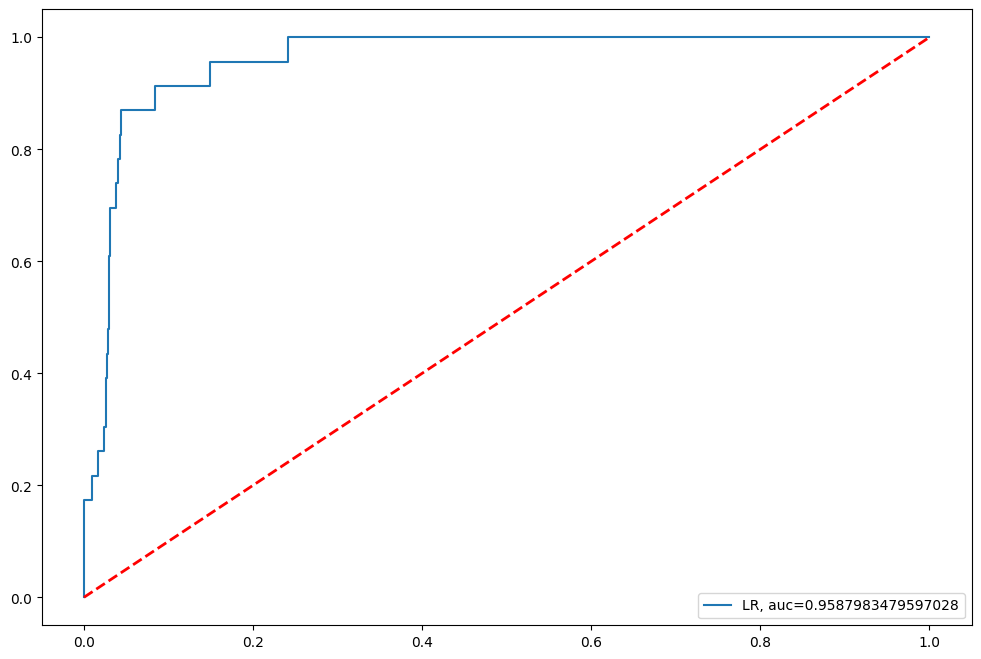

In [28]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label='LR, auc='+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

### Analise da Curva ROC

O que está acontecendo é o nosso modelo tem uma boa curva de 0.95 e quanto mais proximo de 1 melhor, porém no meio do caminho vemos que ela da umas engasgadas, e demora para se estabelecer não é uma subida suave. Vemos que ali no 0.1 de x e 0.19 de y ela já da uma quebrada e não continua a subir e isso se repete, estamos vendo varios quebras até se estabelecer continua em 0,23 de x que fica constante em 1 de y até o final.

Acredito que seja por causa do desbalanceamento de nossas classes. Nossos modelos tem muita dificuldade quando temos uma base de dados assim.

### Balanceamento dos dados

In [29]:
!pip install -U imbalanced-learn

In [30]:
from imblearn.over_sampling import SMOTE
import numpy as np

In [31]:
SEED = 42
smote = SMOTE(random_state=SEED)

In [32]:
x = df.drop('fraude', axis=1)
y = df['fraude']

In [33]:
x_resampled, y_resampled = smote.fit_resample(x, y)

In [34]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

,fraude,tempo,valor,saldo_inicial_cl1,saldo_atualizado_cl1,saldo_inicial_cl2,saldo_atualizado_cl2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0,0,1,0
1,0,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0,0,1,0
2,1,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0,0,0,1
3,1,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,1,0,0,0
4,0,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0,0,0,1
202990,1,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0,0,0,1
202991,1,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0,0,0,0
202992,1,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0,0,0,1


In [35]:
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

Teste com a nova base com o numero de fraudes aumentada.

In [36]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=SEED)

In [37]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('Acuracia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisao: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1 Score: ', metrics.f1_score(y_test, y_pred))

Acuracia:  0.9417722516699837
Precisao:  0.9241993556945234
Recall:  0.9623125493291239
F1 Score:  0.9428709521507975


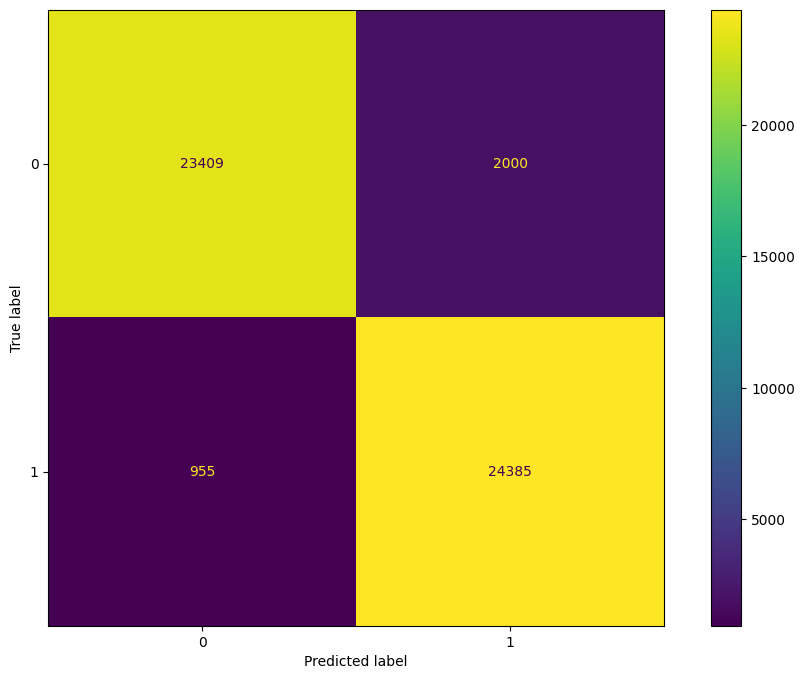

In [38]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

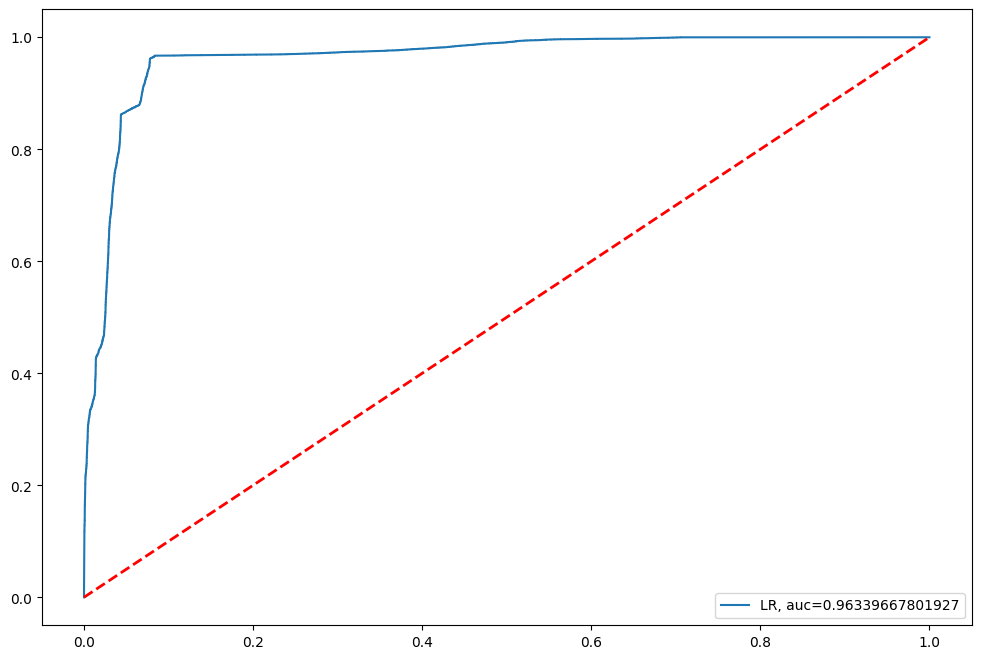

In [39]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label='LR, auc='+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

Olha como ficou com todo o balanceamento, todas as nossas metricas estão melhores, acima de 90, a nossa matrix de confusão começou a acertar muito os casos de verdadeiro positivo, e nossa curva roc sobe bem mais rapido com poucos degraus e tem uma curva mais suave no topo.

Vamos analisar nossa base de dados com o ydata profiling e ver os insights que a analise nos da.

In [40]:
# ydata_profiling.ProfileReport(df_balanced)

Hipoteses:

- O saldo Atualizado cl1 pode estar relacionado pois o cliente pode retirar o dinheiro sempre com alto valor que acontece uma fraude.
- O tempo está muito corelacionado com a fraude, isso pode dizer que há um horario para fazer a fraude em algum momento do dia como por exemplo, sempre a noite ou sempre na madrugada.

# Usando outras tecnicas

Vamos usar a Arvore de decisão para a gente comparar com o outro modelo.

In [43]:
from sklearn.tree import DecisionTreeClassifier


In [44]:
dt = DecisionTreeClassifier(max_depth=5, random_state=SEED)

In [47]:
tree_model = dt.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)

print('Acuracia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisao: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1 Score: ', metrics.f1_score(y_test, y_pred))

Acuracia:  0.9622849711324362
Precisao:  0.9381639982043992
Recall:  0.9897000789265983
F1 Score:  0.9632432017206943


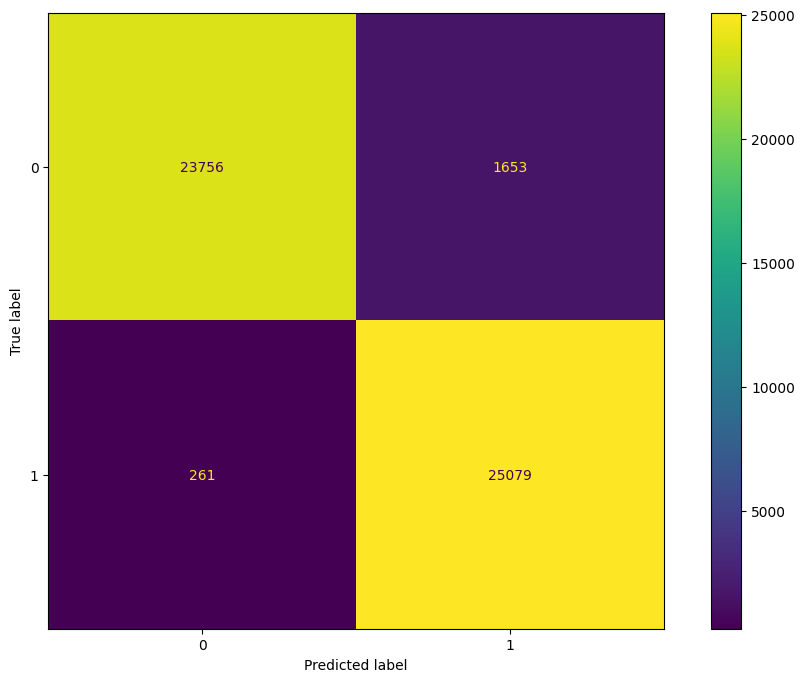

In [48]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

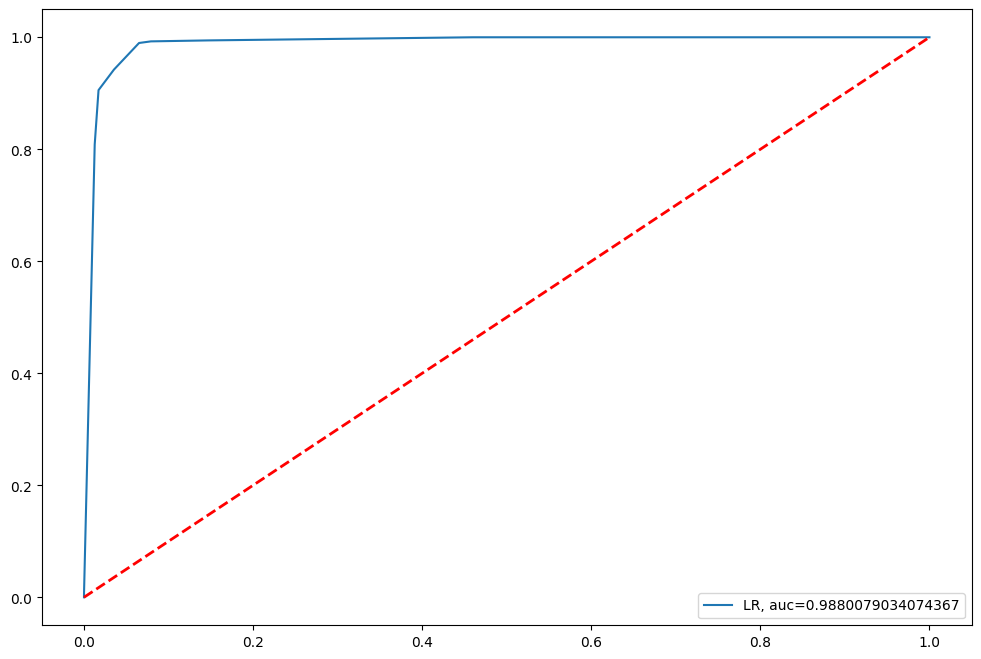

In [50]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label='LR, auc='+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

Aqui vemos que a curva roc está até um pouco melhor e nossa matrix de confusão também, mostra que está errando menos.

Fazeremos a Random forest para ver se aleatoriedade melhora ou apenas muda alguma coisa em nosso estudo.

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(max_depth=5, random_state=SEED)

In [53]:
tree_model = rf.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)

print('Acuracia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisao: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1 Score: ', metrics.f1_score(y_test, y_pred))

Acuracia:  0.9723738398786183
Precisao:  0.9705165500432424
Recall:  0.9742699289660616
F1 Score:  0.9723896175509079


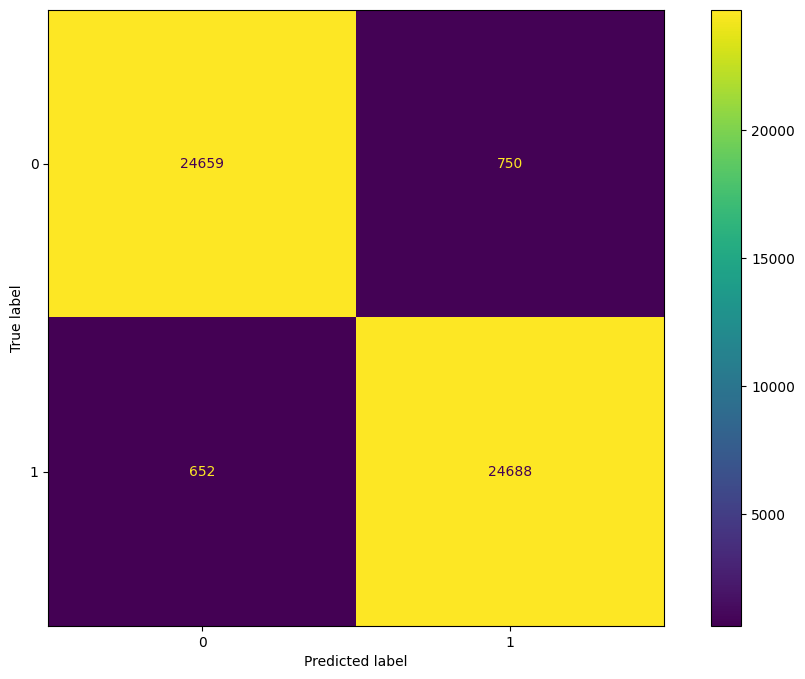

In [54]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

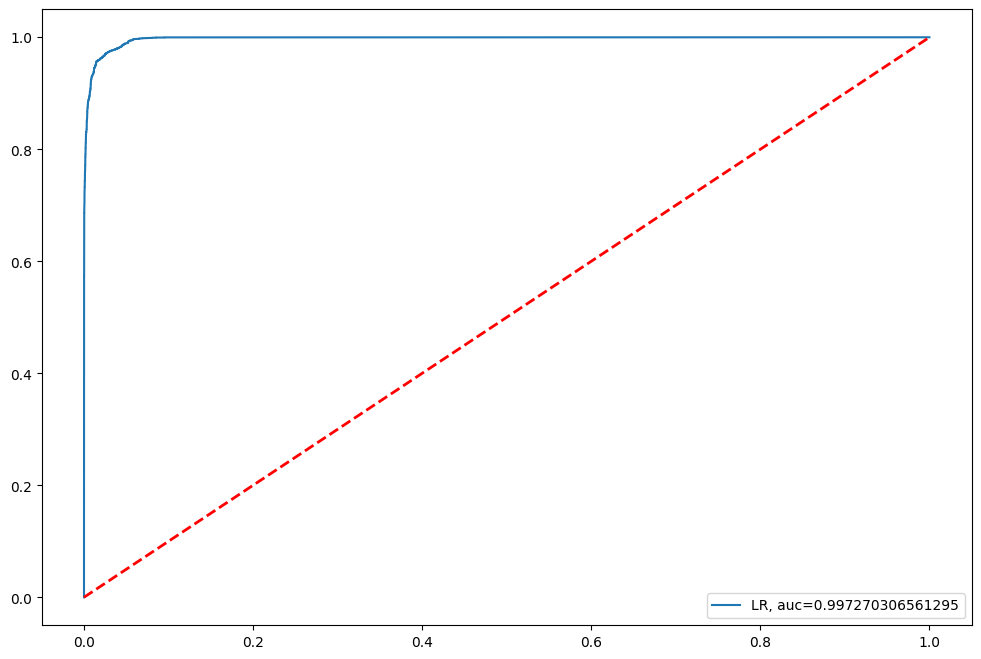

In [55]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label='LR, auc='+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

Vemos que o modelo até melhora, temos mais acuracia, piora um pouco no recall e aqui na curva roc melhora um pouco também. O que a matrix de confusão nos mostra que é que em caso de falso positivo ele classifica mais registros

In [57]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth=5, random_state=SEED),
    RandomForestClassifier(max_depth=5, random_state=SEED)
]

LogisticRegression
****Resultados****
Acuracia:  0.9417722516699837
Precisao:  0.9241993556945234
Recall:  0.9623125493291239
F1 Score:  0.9428709521507975
DecisionTreeClassifier
****Resultados****
Acuracia:  0.9622849711324362
Precisao:  0.9381639982043992
Recall:  0.9897000789265983
F1 Score:  0.9632432017206943
RandomForestClassifier
****Resultados****
Acuracia:  0.9723738398786183
Precisao:  0.9705165500432424
Recall:  0.9742699289660616
F1 Score:  0.9723896175509079


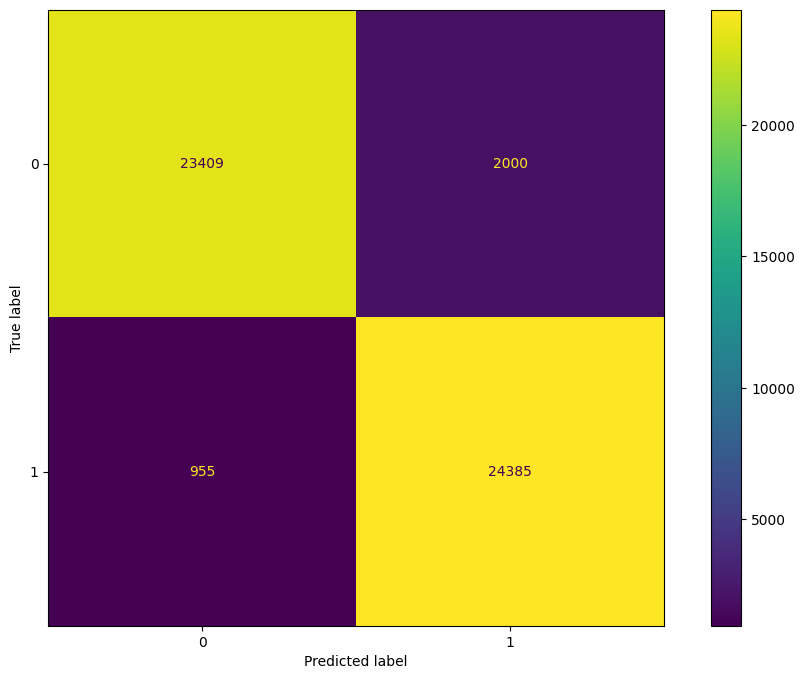

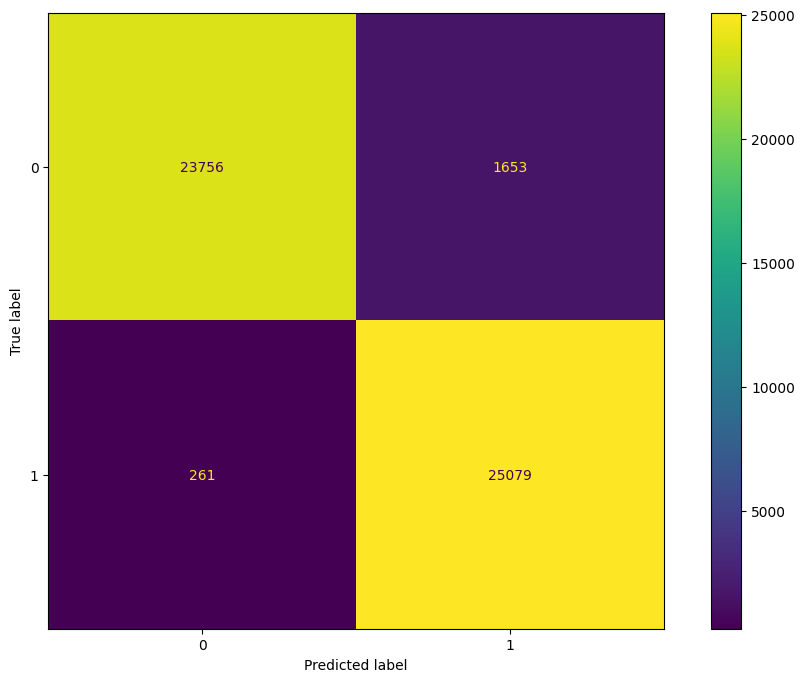

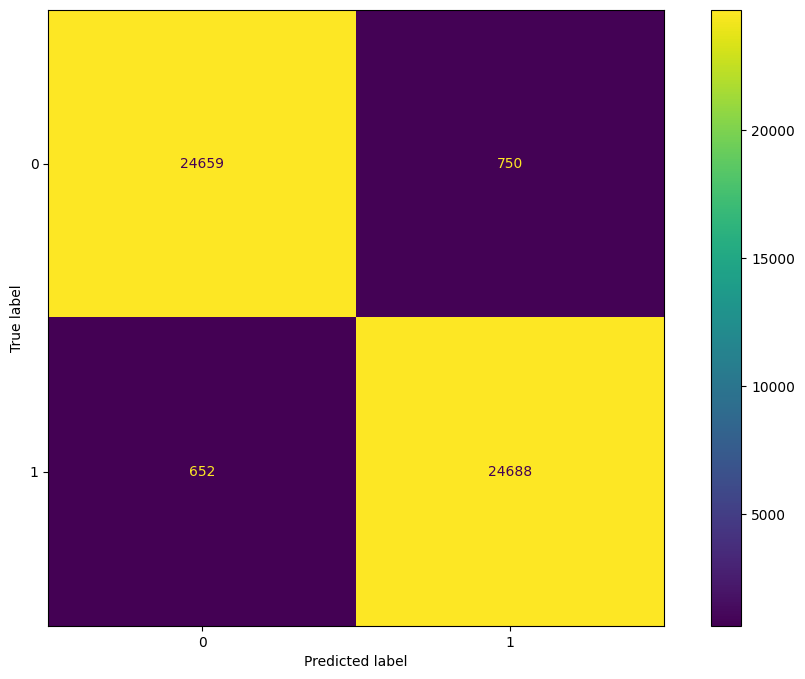

In [58]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print("****Resultados****")
  y_pred = clf.predict(x_test)
  print('Acuracia: ', metrics.accuracy_score(y_test, y_pred))
  print('Precisao: ', metrics.precision_score(y_test, y_pred))
  print('Recall: ', metrics.recall_score(y_test, y_pred))
  print('F1 Score: ', metrics.f1_score(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  display = ConfusionMatrixDisplay(confusion_matrix=cm)
  display.plot()

Isso é uma forma de não ficar subindo e descendo o note para comparar os modelos.

Vamos melhorar o random forest para tentar melhorar os parametros, e estamos escolhendo ele pq o seu recall tem o percentual mais alto, como queremos encontrar os verdadeiros fraudadores ele é o modelo que trouxe a melhor metrica falsos positivos.

In [60]:
n_estimators = np.arange(20, 200, step=20)
criterion = ['gini', 'entropy']
max_feature = ['auto', 'sqrt', 'log2']
max_depth = list(np.arange(2, 10, step=1))
min_simples_split = np.arange(2, 10, step=2)
min_simples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [76]:
param_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_features': max_feature,
    'max_depth': max_depth,
    'min_samples_split': min_simples_split,
    'min_samples_leaf': min_simples_leaf,
    'bootstrap': bootstrap
}

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [78]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring='recall', n_jobs=-1, random_state=SEED
)

In [79]:
%%time
rcv = random_cv.fit(x, y)

CPU times: user 20.8 s, sys: 307 ms, total: 21.1 s
Wall time: 2min 17s


In [80]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,25.525642,1.265432,0.606169,0.012598,120,4,2,auto,9,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.991665,0.999438,0.992817,0.994640,0.003425,2
1,9.672562,0.066497,0.428594,0.003783,120,4,2,auto,2,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.914223,0.936009,0.862704,0.904312,0.030736,5
2,9.229672,0.291941,0.259386,0.089932,40,8,1,sqrt,7,entropy,False,"{'n_estimators': 40, 'min_samples_split': 8, '...",0.980285,1.000000,0.973812,0.984699,0.011138,3
3,17.455033,1.096121,0.621987,0.199218,100,8,4,log2,9,entropy,True,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.993497,0.999025,0.992226,0.994916,0.002951,1
4,13.155702,0.105746,0.699722,0.249143,160,6,2,log2,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 6, ...",0.914223,0.943487,0.876537,0.911416,0.027404,4


In [81]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

In [82]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state=SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

In [83]:
print('Acuracia: ', metrics.accuracy_score(y_test, y_pred))
print('Precisao: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))
print('F1 Score: ', metrics.f1_score(y_test, y_pred))

Acuracia:  0.9915860411042582
Precisao:  0.9906258615936036
Recall:  0.9925414364640884
F1 Score:  0.9915827238857459


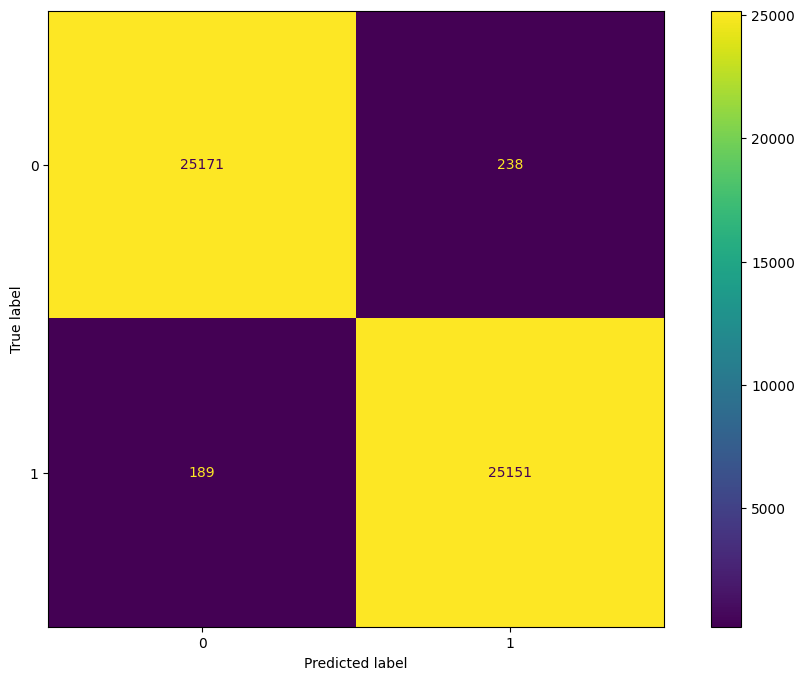

In [84]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

Vemos grande melhora, é nitido não tem muito o que explicar kkkkk

Os falsos positivos diminuiram os verdadeiros negativos diminuiram, está mais acertivo, todas as nossas metricas de avaliação com 99% e a principal que é o recall continua sendo a melhor metrica.